# Homework 1: Python basics & `numpy`

## Notebook setup


In [11]:
# Importing the numpy package
import numpy as np

## Problem 1.1: creating a stimulus/response pair

The goal of this problem is to construct a stimulus set for a delayed match to sample task. In a delayed match to sample task, an animal is presented with a pair of stimuli (usually with some delay period) and then has to indicate when the two stimuli match. In this example the possible stimuli are summarized by the list `stimulus_set` and each stimulus is represented by a character `A`, `B`, etc.

In [4]:
# The possible stimuli 
stimlus_set = ['A', 'B', 'C', 'D']

In [5]:
# Problem 1.1.1
# Look at the documentation for the `itertools` package to find a function that 
# will take all possible pairs of two lists. Use this function and list comprehension
# syntax to create a list of all possible stimulus pairs. 
from itertools import product

stimulus_pairs = [stimulus_pair for stimulus_pair in product(stimlus_set, stimlus_set)]

stimulus_pairs

[('A', 'A'),
 ('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'A'),
 ('B', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'C'),
 ('C', 'D'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'D')]

In [7]:
# Problem 1.1.2
# Use whatever means necessary to construct a dictionary called `correct_repsonses` 
# containing the correct responses for the animal to each of these stimuli.
# The keys should be the stimuli pairs and the values should be the correct responses. 
# When the stimuli matches the response should be "go" when the stimuli disagree 
# te response should be "nogo." e.g. it would contain the key value pair {'AA': 'go', ...}.
# Don't do this by hand, use loops, if statements, whatever you need. 

correct_responses = {}
for stimulus_pair in stimulus_pairs:
    if stimulus_pair[0] == stimulus_pair[1]:
        correct_responses[stimulus_pair] = 'go'
    else:
        correct_responses[stimulus_pair] = 'nogo'
        
correct_responses

{('A', 'A'): 'go',
 ('A', 'B'): 'nogo',
 ('A', 'C'): 'nogo',
 ('A', 'D'): 'nogo',
 ('B', 'A'): 'nogo',
 ('B', 'B'): 'go',
 ('B', 'C'): 'nogo',
 ('B', 'D'): 'nogo',
 ('C', 'A'): 'nogo',
 ('C', 'B'): 'nogo',
 ('C', 'C'): 'go',
 ('C', 'D'): 'nogo',
 ('D', 'A'): 'nogo',
 ('D', 'B'): 'nogo',
 ('D', 'C'): 'nogo',
 ('D', 'D'): 'go'}

In [12]:
# Problem 1.1.3
# Look up the DICTIONARY.items() syntax to construct a loop that prints 
# out each stimulus and response pair contained in correct_responses. 
# Use fstrings to make this readable for the user.
# 
# EXTRA CREDIT: Use `zip` or `enumerate` to add print a number before 
# each of the stimulus, response combinations. 


for i, (pair, response) in enumerate(correct_responses.items()):
    print(f"{i}:\tStimulus is {pair} and correct response is {response}")


0:	Stimulus is ('A', 'A') and correct response is go
1:	Stimulus is ('A', 'B') and correct response is nogo
2:	Stimulus is ('A', 'C') and correct response is nogo
3:	Stimulus is ('A', 'D') and correct response is nogo
4:	Stimulus is ('B', 'A') and correct response is nogo
5:	Stimulus is ('B', 'B') and correct response is go
6:	Stimulus is ('B', 'C') and correct response is nogo
7:	Stimulus is ('B', 'D') and correct response is nogo
8:	Stimulus is ('C', 'A') and correct response is nogo
9:	Stimulus is ('C', 'B') and correct response is nogo
10:	Stimulus is ('C', 'C') and correct response is go
11:	Stimulus is ('C', 'D') and correct response is nogo
12:	Stimulus is ('D', 'A') and correct response is nogo
13:	Stimulus is ('D', 'B') and correct response is nogo
14:	Stimulus is ('D', 'C') and correct response is nogo
15:	Stimulus is ('D', 'D') and correct response is go


## Problem 1.2: parsing a spike train

Below are two variables `spike_times` and `stimulus_onset`.

* `spike_times` represent recorded spikes from a single neuron measured in seconds from the beginning of the session. 
* `stimulus_onset` represents the onset times of the nine stimuli presented in the session. 

We're going to develop a function that parses the spike train over the entire session to generate arrays which measure spike times relative to the stimulus for each stimulus presentation. 

In [13]:
# Constructing the articificial data
spike_times = 10*np.random.rand(1000)
spike_times.sort()

stimulus_onset = np.arange(1, 10, 1.0)

print(f"spike times = \n {spike_times}\n")
print(f"stimulus_onset = \n {stimulus_onset}")

spike times = 
 [1.70542122e-03 2.02642628e-02 2.18787005e-02 2.19394306e-02
 2.75292139e-02 3.30234102e-02 4.20052341e-02 7.67788854e-02
 7.79225882e-02 8.67249218e-02 1.14583320e-01 1.22200500e-01
 1.34763895e-01 1.34915867e-01 1.41810362e-01 1.44971045e-01
 1.49276850e-01 1.55717732e-01 1.95234286e-01 2.34424113e-01
 2.38424569e-01 2.38453092e-01 2.48418059e-01 2.83390381e-01
 2.84121640e-01 2.88629817e-01 3.01487845e-01 3.05212082e-01
 3.06166076e-01 3.07920467e-01 3.17578114e-01 3.34327244e-01
 3.41997030e-01 3.43381156e-01 3.49157251e-01 3.50592335e-01
 3.53570864e-01 3.54583760e-01 3.56682063e-01 3.61579023e-01
 3.64481046e-01 3.65919048e-01 3.76259125e-01 3.83272100e-01
 3.87302383e-01 4.01505688e-01 4.06593559e-01 4.12610985e-01
 4.21763098e-01 4.34228313e-01 4.56107394e-01 4.66674712e-01
 4.81677589e-01 4.98580543e-01 5.07536874e-01 5.17519758e-01
 5.27120602e-01 5.44864459e-01 5.54494610e-01 5.87299968e-01
 5.92435956e-01 6.12553423e-01 6.35678393e-01 6.48292307e-01
 6.65582

In [17]:
## Problem 1.2.1: 
# Write a script that generates an array with all the spikes recorded 
# 0.5 s before and 0.5 s after the first stimulus is played at t=1.0s.
# change the spike times so they are difined relative to stimulus onset 
# rather than the beginning of the session. Name this array 
# `spike_times_rel_to_stim`

# selecting only the spikes we want 
spike_times_rel_to_stim = spike_times[(spike_times>=stimulus_onset[0]-0.5) & (spike_times<stimulus_onset[0]+0.5)]

# shifting times relative to stim_onset[0]
spike_times_rel_to_stim -= stimulus_onset[0]

spike_times_rel_to_stim

array([-0.49246313, -0.48248024, -0.4728794 , -0.45513554, -0.44550539,
       -0.41270003, -0.40756404, -0.38744658, -0.36432161, -0.35170769,
       -0.33441706, -0.33273308, -0.32307979, -0.31559451, -0.30929227,
       -0.29729442, -0.28969639, -0.2677534 , -0.25354113, -0.23781743,
       -0.23054046, -0.21446086, -0.20540382, -0.19942905, -0.18133964,
       -0.16839363, -0.1526707 , -0.14582936, -0.14008493, -0.13918204,
       -0.09188324, -0.05578235, -0.05320592, -0.04963648, -0.04067099,
       -0.02533436, -0.02119368, -0.01762821, -0.0150832 ,  0.00676248,
        0.0147024 ,  0.03152938,  0.05433019,  0.05843691,  0.06192384,
        0.06641203,  0.06803393,  0.0715406 ,  0.08101062,  0.08332151,
        0.11319582,  0.12537474,  0.15924287,  0.15962649,  0.17176329,
        0.19453834,  0.19529766,  0.20087661,  0.20924023,  0.21901665,
        0.25665532,  0.26526935,  0.26827224,  0.2705622 ,  0.28677626,
        0.28915381,  0.31925427,  0.32483066,  0.34577283,  0.35

In [19]:
## Problem 1.2.2
# Use the script from the previous problem and a for loop to generate a
# list of numpy arrays named `spike_times_rel_to_stims` where each element of the 
# list is an array like one above except relative to each stimulus presented.
# i.e. 
# spike_times_rel_to_stims[0] = the array from the previous problem
# spike_times_rel_to_stims[1] = the array of spikke times relative to the stimulus played at t=2.0s 
# etc. 


spike_times_rel_to_stims = [spike_times[(spike_times>=t-0.5) & (spike_times<t+0.5)] - t for t in stimulus_onset]

spike_times_rel_to_stims

[array([-0.49246313, -0.48248024, -0.4728794 , -0.45513554, -0.44550539,
        -0.41270003, -0.40756404, -0.38744658, -0.36432161, -0.35170769,
        -0.33441706, -0.33273308, -0.32307979, -0.31559451, -0.30929227,
        -0.29729442, -0.28969639, -0.2677534 , -0.25354113, -0.23781743,
        -0.23054046, -0.21446086, -0.20540382, -0.19942905, -0.18133964,
        -0.16839363, -0.1526707 , -0.14582936, -0.14008493, -0.13918204,
        -0.09188324, -0.05578235, -0.05320592, -0.04963648, -0.04067099,
        -0.02533436, -0.02119368, -0.01762821, -0.0150832 ,  0.00676248,
         0.0147024 ,  0.03152938,  0.05433019,  0.05843691,  0.06192384,
         0.06641203,  0.06803393,  0.0715406 ,  0.08101062,  0.08332151,
         0.11319582,  0.12537474,  0.15924287,  0.15962649,  0.17176329,
         0.19453834,  0.19529766,  0.20087661,  0.20924023,  0.21901665,
         0.25665532,  0.26526935,  0.26827224,  0.2705622 ,  0.28677626,
         0.28915381,  0.31925427,  0.32483066,  0.3

In [20]:
## Problem 1.2.3
# wrap the code from the previous problem in a funtion which takes two arguments
# spike_times & event_times (in the cases above we are setting event_times as stimulus_onset)

def relative_spike_times(spike_times, event_times):
    """
    This function takes an array of spike_times recorded relative 
    to the beginning of a session and returns spike times realtive 
    to each of the events in event_times. (Within a 1 s window 
    centered on the event time)
    """
    spike_times_rel_to_events = [spike_times[(spike_times>=t-0.5) & (spike_times<t+0.5)] - t for t in event_times]
    return(spike_times_rel_to_events)

# Extra credit: what if you wanted to include the time pre_event and post_event that is included as a keyword argument?

In [32]:
# This block creates articificial data from a second neuron 
spike_times_2 = spike_times - np.random.normal(loc=0.1, scale=0.1, size=len(spike_times))

In [37]:
## Problem 1.2.4
# `spike_times_2` represents the spikes times of another neuron recorded during the same session
# Use the function you just wrote to find the firing times of neuron 1 relative to neuron 2
# Compute the average time difference. using the output. Is it postive or negative? What does 
# that tell you about the relative spike timing of these two cells? 


spikes_in_1_vs_2 = relative_spike_times(spike_times, spike_times_2)


for rel_spikes in spikes_in_1_vs_2:
    print(np.mean(rel_spikes))

0.32414981961730893
0.23834821993425886
0.30628848604061987
0.2901862218909732
0.3207717173941416
0.19849302234710087
0.3302061581654568
0.2651185063533484
0.3337353329126577
0.2528100102733067
0.23008287428878274
0.1848680718805526
0.11709863581586427
0.3075890060304417
0.20726833218285642
0.17979785566446846
0.17585511861398978
0.2562261270277258
0.20814242153875237
-0.011358122978654182
0.18672041137108783
0.11574841725008052
0.08208213824576428
0.08457515966223718
0.14273265992790762
0.11743009286292107
0.08946845299902377
0.19922135265556884
0.1979973592883015
0.13622845112164692
0.10782866780101404
0.09065924615835003
0.09883579684131648
0.12517961664517596
0.08201404248045381
0.013296827125706482
0.11799456716960534
0.1168950252499062
0.047794279441473776
0.04817604684947787
0.09550425609338382
0.09617410614894392
0.1921415947934323
0.050610575146038395
0.07936721820605697
0.10227193983368897
0.05945126511987653
0.15028873449945762
0.058553320377682024
0.04357391988829009
0.0988

## Problem 1.3: Scipy 

In this problem, You'll be getting used to some of the mechanics of `numpy` and how you look up tools in `scipy`. We're going to generate points from the function 

$$f(x) = \cos\left(\frac{x}{\pi} -0.2\right) + 0.8$$

In [39]:
# Problem 1.3.1
# Write a function `f` that takes `x` as an argument and returns the value
# specfiied by the equation above. Recall: `numpy` has all the standard trig.
# functions build in as well as constants like `pi`

def f(x):
    """
    This is the function I'd like to integrate
    """
    return(np.cos(x / np.pi - 0.2) + 0.8)

In [42]:
# Problem 1.3.2 
# Let's say we'd like to numeraically integrate this function from 0 to 2. 
# Look up how you would do that using the `scipy.integrate.quad` function
# Feel free to play around with the limits of integration to make sure that
# this function is doing something sensible. (e.g. integrating from 0 to 0
# should return 0)

from scipy.integrate import quad

quad(f, 0, 2)

(3.55265095026546, 3.944234883441156e-14)

In [43]:
# Problem 1.3.3 
# Plotting teaser! Generate an array `X`, which contains `X` values from 
# -5 to 5. Then use `X` to make an array `F` containing the value of `F` 
# for all those values. The code in the cell below will then plot the function. 

X = np.linspace(-5, 5, 101)
F = f(X)

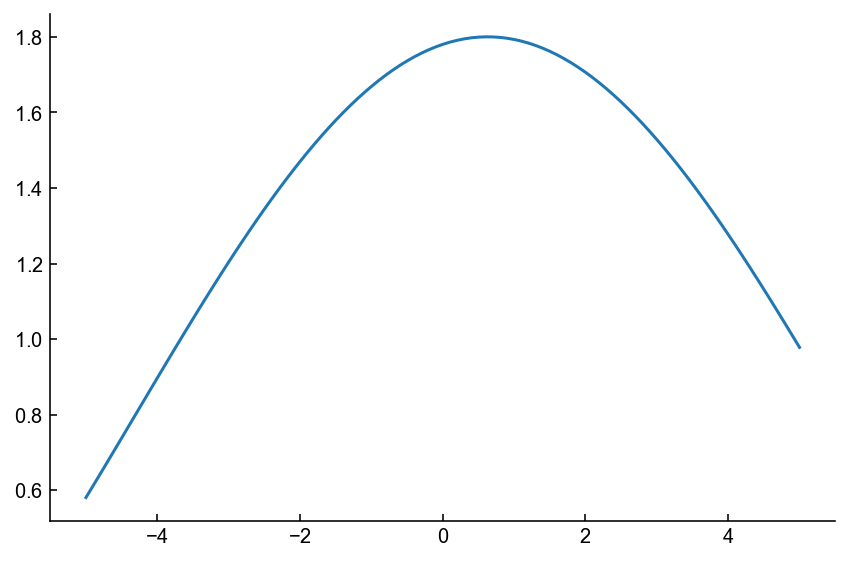

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X,F)

## Problem 1.4: Build-a-matrix 

### Problem 1.4.1

Construct a matrix multiplation of your own similar to what we did in class. Take two arrays (the second can be a vector as we did in class). Explain the meaning of the dimensions of each and why matrix multiplication would be approprpriate. Give these arrays names that make sense given what they contain. Use python naming conventions. 

Code these in and use the matrix multiplication operator `@` to use python to execute the operation and find the result. Show that the shape of the final array makes sense given the shapes of the two arrays you multiplied

**your description in markdown goes here**

In [ ]:
# Your code goes here




### Problem 1.4.2 

Exactly the same as the previous part except now we'd like to combing two arrays via pointwise multiplication. Come up with an example pair, etc. 


**your description in markdown goes here**

In [ ]:
# Your code goes here


